# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [ ]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-10-22 23:54:06--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-10-22 23:54:06--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip’

cus

In [ ]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


In [ ]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [ ]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

Gender, age, category y price, porque permiten entender el perfil demográfico del comprador y sus preferencias de consumo. El género y la edad ayudan a identificar diferencias en comportamiento y necesidades

## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [ ]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [ ]:
df['total_value'] = df['quantity'] * df['price']

df.total_value.head()
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_value
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

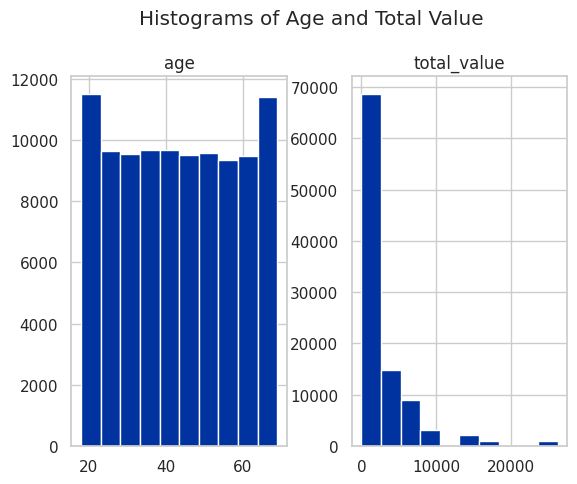

/tmp/ipython-input-1286265033.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='age', data=df, palette=corporate_colors)
/tmp/ipython-input-1286265033.py:9: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(y='age', data=df, palette=corporate_colors)
/tmp/ipython-input-1286265033.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='total_value', data=df, palette=corporate_colors)
/tmp/ipython-input-1286265033.py:14: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(y='total_value', data=df, palette=corporate_colors)


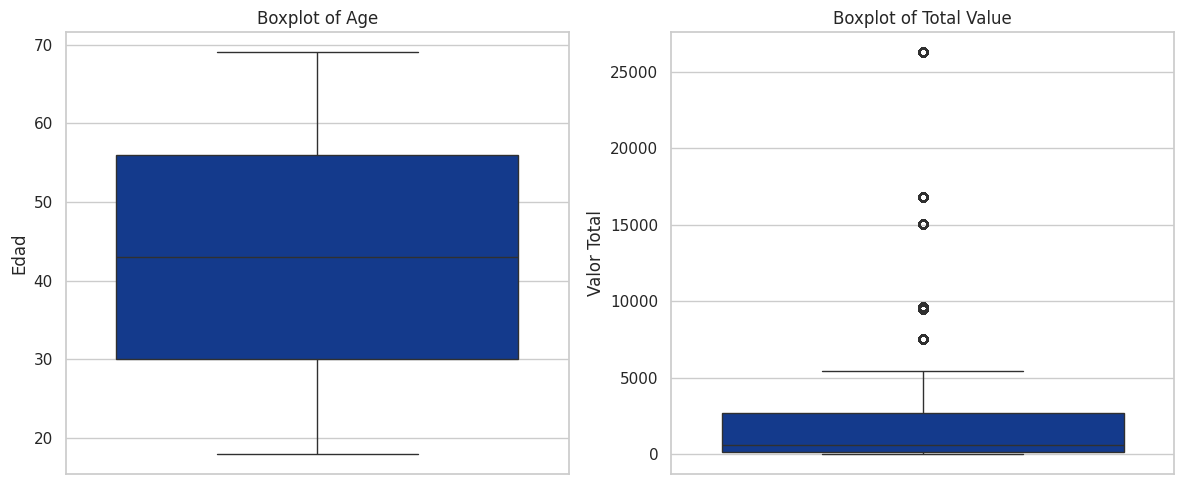

In [ ]:
# Histograms
df.hist(column=['age', 'total_value'])
plt.suptitle('Histograms of Age and Total Value', y=1.02)
plt.show()

# Boxplots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y='age', data=df, palette=corporate_colors)
plt.title('Boxplot of Age')
plt.ylabel('Edad')

plt.subplot(1, 2, 2)
sns.boxplot(y='total_value', data=df, palette=corporate_colors)
plt.title('Boxplot of Total Value')
plt.ylabel('Valor Total')

plt.tight_layout()
plt.show()

las personas mas jovenes y viejas son las que tienen mas tendencia a comprar

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

In [ ]:
# Segmentar la edad en categorías
bins_Edad = [0, 30, 55, 120]
labels_Edad = ['Jóvenes', 'Adultos', 'Mayores']
df['age_group'] = pd.cut(df['age'], bins=bins_Edad, labels=labels_Edad)

print("Distribución de Clientes por Grupo de Edad:")
display(df['age_group'].value_counts())

Distribución de Clientes por Grupo de Edad:


,count
age_group,
Adultos,47846
Mayores,26587
Jóvenes,25024


/tmp/ipython-input-1169629729.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmento_df = df.groupby(['age_group', 'gender'])['customer_id'].nunique().reset_index()


  age_group  gender  Cantidad_Clientes
0   Jóvenes  Female              14911
1   Jóvenes    Male              10113
2   Adultos  Female              28677
3   Adultos    Male              19169
4   Mayores  Female              15894
5   Mayores    Male              10693


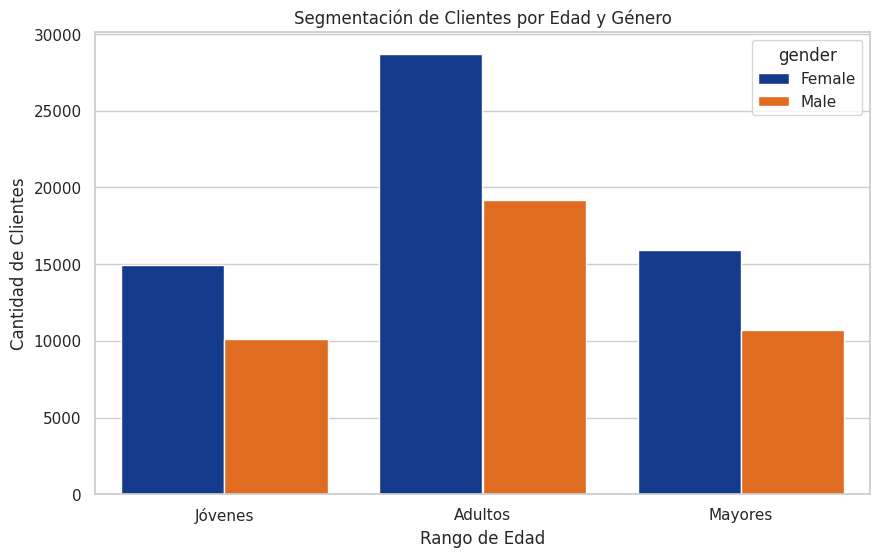

In [ ]:
segmento_df = df.groupby(['age_group', 'gender'])['customer_id'].nunique().reset_index()
segmento_df = segmento_df.rename(columns={'customer_id': 'Cantidad_Clientes'})

print(segmento_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='Cantidad_Clientes', hue='gender', data=segmento_df)
plt.title('Segmentación de Clientes por Edad y Género')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Clientes')
plt.show()

## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

Cantidad de clientes por categoría de productos:
 category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: customer_id, dtype: int64


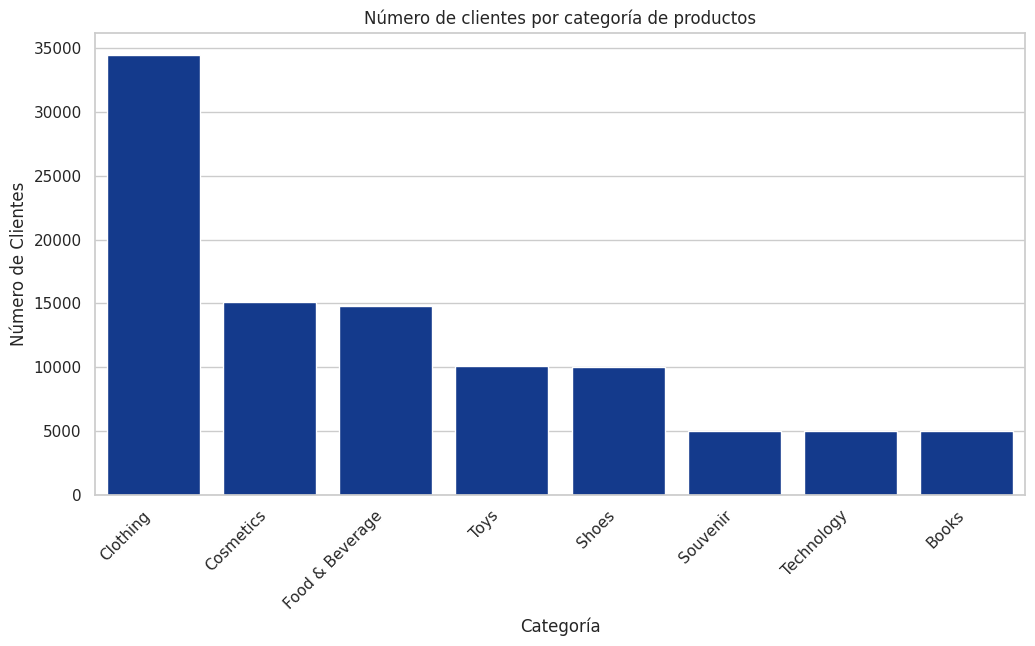

In [ ]:
category_counts = df.groupby(['category'])['customer_id'].nunique().sort_values(ascending=False)
print("Cantidad de clientes por categoría de productos:\n", category_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Número de clientes por categoría de productos')
plt.xlabel('Categoría')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha="right")
plt.show()

Cantidad de clientes por método de pago:
 payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: customer_id, dtype: int64


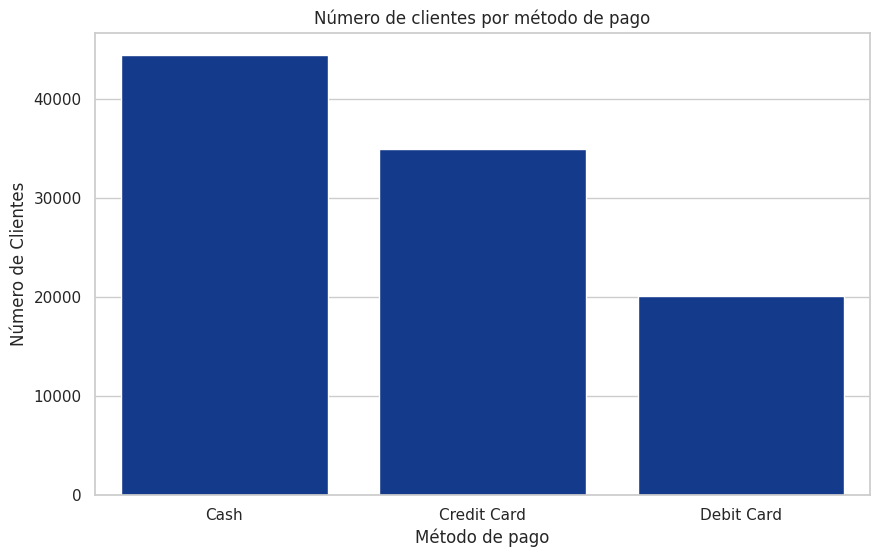

In [ ]:
# Análisis de comportamiento de compra por método de pago
payment_counts = df.groupby(['payment_method'])['customer_id'].nunique().sort_values(ascending=False)
print("Cantidad de clientes por método de pago:\n", payment_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.title('Número de clientes por método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Número de Clientes')
plt.show()


Cantidad de clientes por centro comercial:
 shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: customer_id, dtype: int64


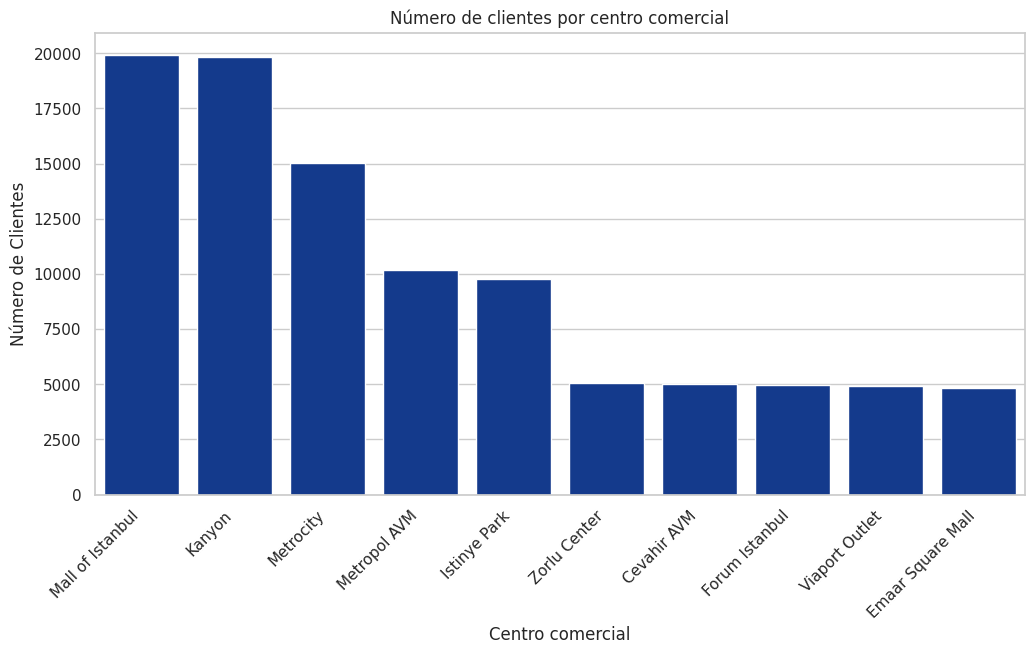

In [ ]:
# Análisis de comportamiento de compra por centro comercial
mall_counts = df.groupby(['shopping_mall'])['customer_id'].nunique().sort_values(ascending=False)
print("Cantidad de clientes por centro comercial:\n", mall_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=mall_counts.index, y=mall_counts.values)
plt.title('Número de clientes por centro comercial')
plt.xlabel('Centro comercial')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha="right")
plt.show()


Cantidad de clientes por categoría y método de pago:
 payment_method    Cash  Credit Card  Debit Card
category                                       
Books             2268         1696        1017
Clothing         15456        12025        7006
Cosmetics         6674         5336        3087
Food & Beverage   6587         5250        2939
Shoes             4474         3553        2007
Souvenir          2211         1770        1018
Technology        2235         1753        1008
Toys              4542         3548        1997


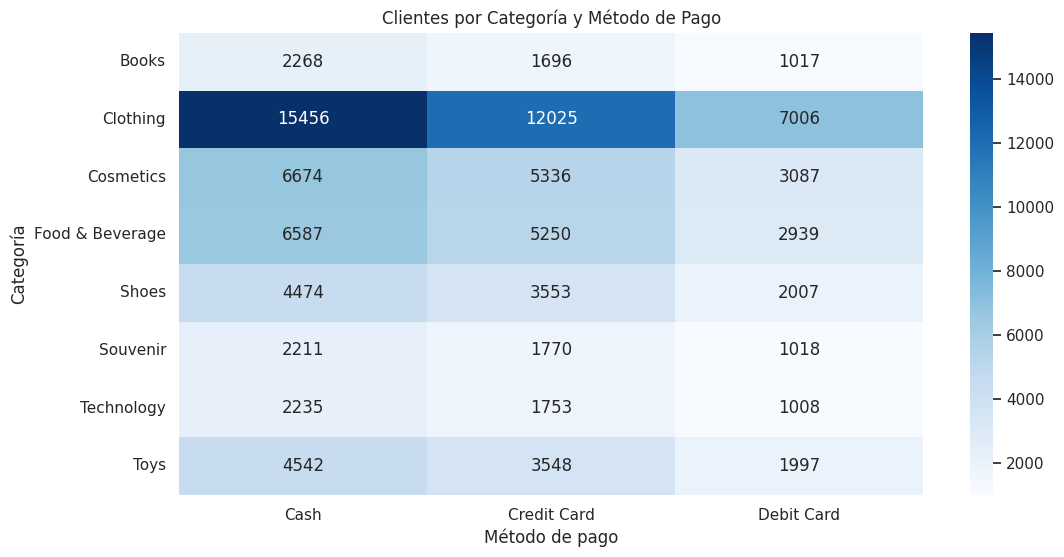

In [ ]:
# Análisis de comportamiento de compra por categoría y método de pago
category_payment_counts = df.groupby(['category', 'payment_method'])['customer_id'].nunique().unstack()
print("Cantidad de clientes por categoría y método de pago:\n", category_payment_counts)

plt.figure(figsize=(12, 6))
sns.heatmap(category_payment_counts, annot=True, cmap='Blues', fmt='g')
plt.title('Clientes por Categoría y Método de Pago')
plt.xlabel('Método de pago')
plt.ylabel('Categoría')
plt.show()

Cantidad de clientes por centro comercial y categoría:
 category           Books  Clothing  Cosmetics  Food & Beverage  Shoes  \
shopping_mall                                                           
Cevahir AVM          258      1729        732              772    490   
Emaar Square Mall    236      1651        760              692    498   
Forum Istanbul       252      1729        770              712    458   
Istinye Park         462      3353       1458             1490   1001   
Kanyon              1013      6840       3023             2909   2017   
Mall of Istanbul    1025      6923       3050             2957   2023   
Metrocity            752      5268       2265             2244   1457   
Metropol AVM         476      3525       1541             1517   1074   
Viaport Outlet       246      1708        734              733    497   
Zorlu Center         261      1761        764              750    519   

category           Souvenir  Technology  Toys  
shopping_mall      

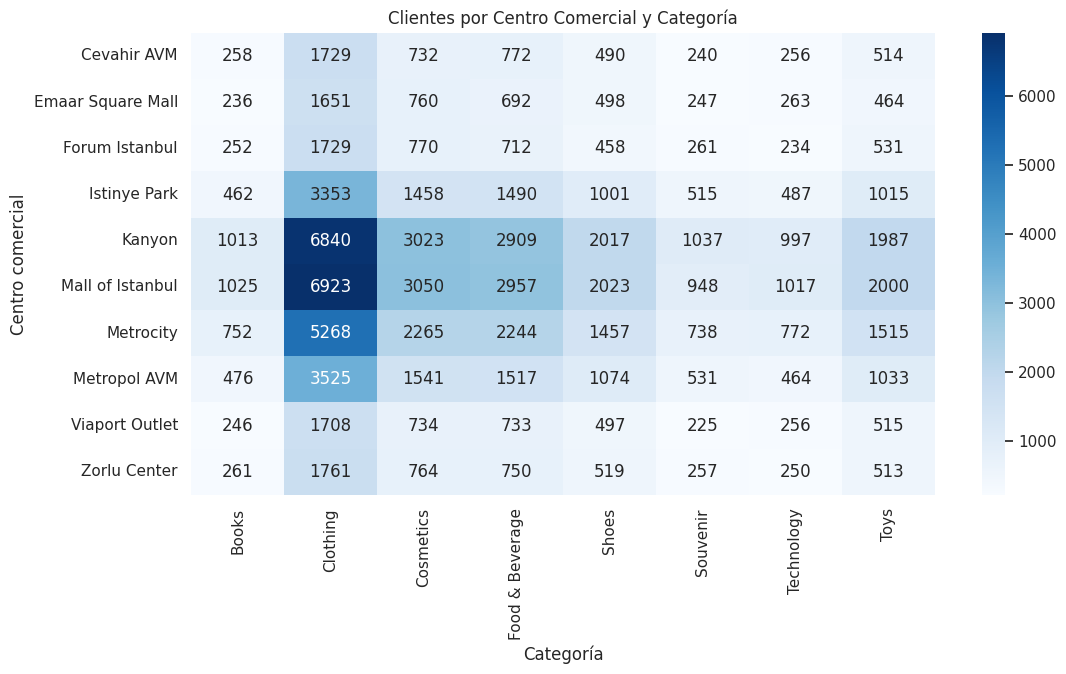

In [ ]:

# Análisis de comportamiento de compra por centro comercial y categoría
mall_category_counts = df.groupby(['shopping_mall', 'category'])['customer_id'].nunique().unstack()
print("Cantidad de clientes por centro comercial y categoría:\n", mall_category_counts)

plt.figure(figsize=(12, 6))
sns.heatmap(mall_category_counts, annot=True, cmap='Blues', fmt='g')
plt.title('Clientes por Centro Comercial y Categoría')
plt.xlabel('Categoría')
plt.ylabel('Centro comercial')
plt.show()


## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

Teniendo en cuenta los hábitos de consumo, la categoría del producto y la forma de pago son factores determinantes para construir una estrategia de marketing efectiva.

La categoría del producto permite reconocer qué tipos de artículos generan mayor interés, facilitando la focalización de acciones comerciales en aquellos segmentos y productos con mejor potencial.

Por su parte, el método de pago revela las preferencias al momento de realizar la compra, lo cual ayuda a crear promociones específicas o beneficios asociados a ciertos medios de pago para incentivar la conversión.

En conjunto, estas variables aportan información clave para diseñar ofertas más personalizadas y optimizar la experiencia del cliente.

Cantidad de clientes por segmento de edad y categoría:
 category   Books  Clothing  Cosmetics  Food & Beverage  Shoes  Souvenir  \
age_group                                                                 
Jóvenes     1253      8726       3719             3687   2529      1251   
Adultos     2376     16545       7320             7154   4829      2381   
Mayores     1352      9216       4058             3935   2676      1367   

category   Technology  Toys  
age_group                    
Jóvenes          1243  2616  
Adultos          2452  4789  
Mayores          1301  2682  


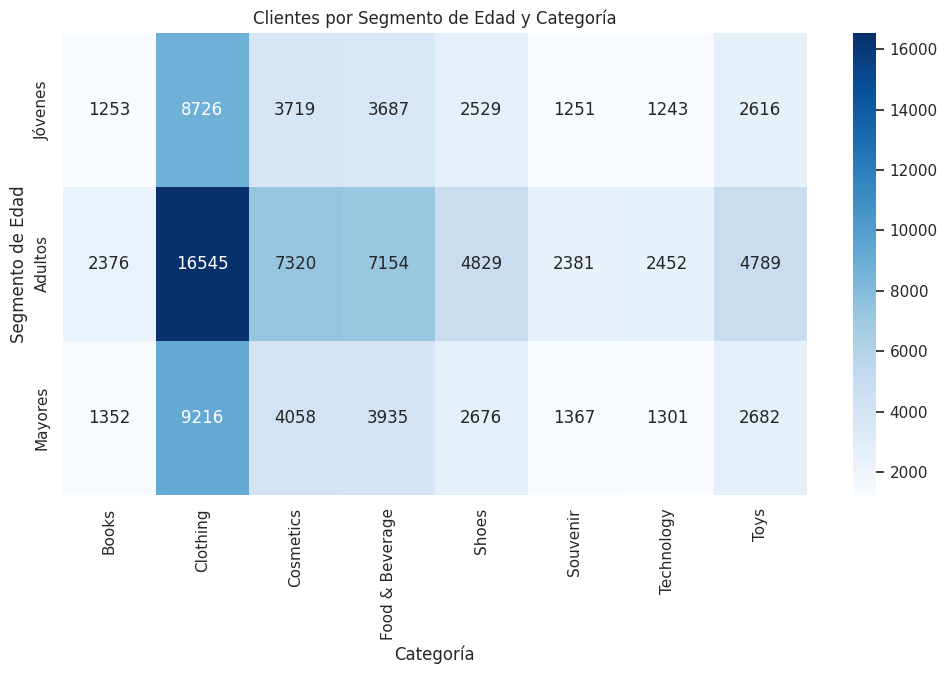

In [ ]:
# Agrupación por segmento de edad y categoría de producto
age_category_counts = df.groupby(['age_group', 'category'], observed=False)['customer_id'].nunique().unstack()
print("Cantidad de clientes por segmento de edad y categoría:\n", age_category_counts)

plt.figure(figsize=(12, 6))
sns.heatmap(age_category_counts, annot=True, cmap='Blues', fmt='g')
plt.title('Clientes por Segmento de Edad y Categoría')
plt.xlabel('Categoría')
plt.ylabel('Segmento de Edad')
plt.show()

/tmp/ipython-input-3140231884.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_payment_counts = df.groupby(['age_group', 'payment_method'])['customer_id'].nunique().unstack()


Cantidad de clientes por segmento de edad y método de pago:
 payment_method   Cash  Credit Card  Debit Card
age_group                                     
Jóvenes         11177         8785        5062
Adultos         21325        16826        9695
Mayores         11945         9320        5322


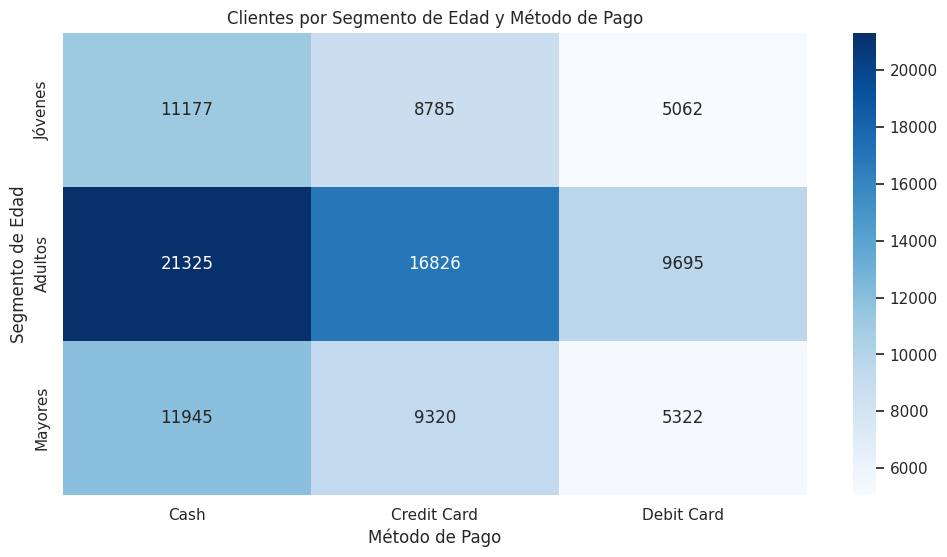

In [ ]:
# Agrupación por segmento de edad y método de pago
age_payment_counts = df.groupby(['age_group', 'payment_method'])['customer_id'].nunique().unstack()
print("Cantidad de clientes por segmento de edad y método de pago:\n", age_payment_counts)

plt.figure(figsize=(12, 6))
sns.heatmap(age_payment_counts, annot=True, cmap='Blues', fmt='g')
plt.title('Clientes por Segmento de Edad y Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Segmento de Edad')
plt.show()


A partir del análisis de las visualizaciones, se identifica un segmento de especial interés: los adultos que realizan la mayoría de sus compras en la categoría Clothing. Dentro de este grupo se evidencia una inclinación marcada por el pago en efectivo. Esta mezcla de características —edad, tipo de producto adquirido y método de pago preferido— permite reconocer un perfil de consumidor con patrones definidos y con un potencial significativo para estrategias enfocadas en clientes de alto valor.

## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

/tmp/ipython-input-3758230846.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_counts = df.groupby(['age_group', 'Agrupa'])['customer_id'].nunique().unstack()


Cantidad de clientes por segmento de edad y categoría:
 Agrupa     Comida  Cosmeticos  Libros  Otros   Ropa  Zapatos
age_group                                                   
Jóvenes      3687        3719    1253   5110   8726     2529
Adultos      7154        7320    2376   9622  16545     4829
Mayores      3935        4058    1352   5350   9216     2676


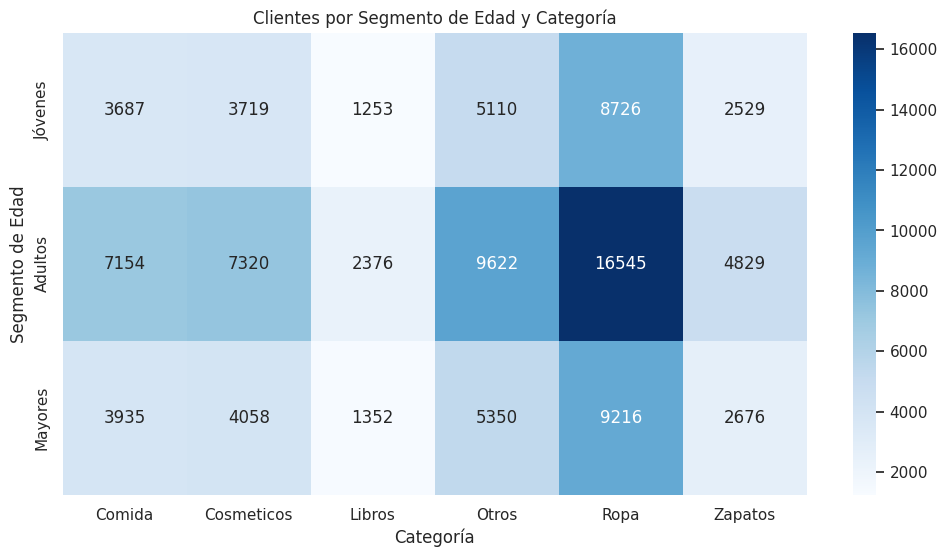

In [ ]:
df['Agrupa'] = df['category'].replace({
                  'Books': 'Libros',
                  'Clothing': 'Ropa',
                  'Cosmetics': 'Cosmeticos',
                  'Food & Beverage': 'Comida',
                  'Shoes': 'Zapatos',
                  'Souvenir': 'Otros',
                  'Technology': 'Otros',
                  'Toys': 'Otros',
                })
age_category_counts = df.groupby(['age_group', 'Agrupa'])['customer_id'].nunique().unstack()
print("Cantidad de clientes por segmento de edad y categoría:\n", age_category_counts)

plt.figure(figsize=(12, 6))
sns.heatmap(age_category_counts, annot=True, cmap='Blues', fmt='g')
plt.title('Clientes por Segmento de Edad y Categoría')
plt.xlabel('Categoría')
plt.ylabel('Segmento de Edad')
plt.show()

## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

In [ ]:
def asignar_segmento(row):
    return f"{row['age_group']}_{row['category']}"

df['Segmento_Comb'] = df.apply(asignar_segmento, axis=1)
seg_counts = df['Segmento_Comb'].value_counts().reset_index()
seg_counts.columns = ['Segmento_Comb', 'Cantidad']
seg_counts

,Segmento_Comb,Cantidad
0,Adultos_Clothing,16545
1,Mayores_Clothing,9216
2,Jóvenes_Clothing,8726
3,Adultos_Cosmetics,7320
4,Adultos_Food & Beverage,7154
5,Adultos_Shoes,4829
6,Adultos_Toys,4789
7,Mayores_Cosmetics,4058
8,Mayores_Food & Beverage,3935
9,Jóvenes_Cosmetics,3719


## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

Precio promedio por Segmento Combinado:
              Segmento_Comb  Precio_Promedio
0             Adultos_Books        45.245960
1          Adultos_Clothing       902.380190
2         Adultos_Cosmetics       122.635448
3   Adultos_Food & Beverage        15.703890
4             Adultos_Shoes      1808.464210
5          Adultos_Souvenir        34.657938
6        Adultos_Technology      3150.856444
7              Adultos_Toys       107.302969
8             Jóvenes_Books        46.417279
9          Jóvenes_Clothing       897.351309
10        Jóvenes_Cosmetics       122.482920
11  Jóvenes_Food & Beverage        15.675815
12            Jóvenes_Shoes      1823.529569
13         Jóvenes_Souvenir        35.321271
14       Jóvenes_Technology      3109.452936
15             Jóvenes_Toys       107.588502
16            Mayores_Books        45.349149
17         Mayores_Clothing       902.291328
18        Mayores_Cosmetics       122.080197
19  Mayores_Food & Beverage        15.610254
20            M

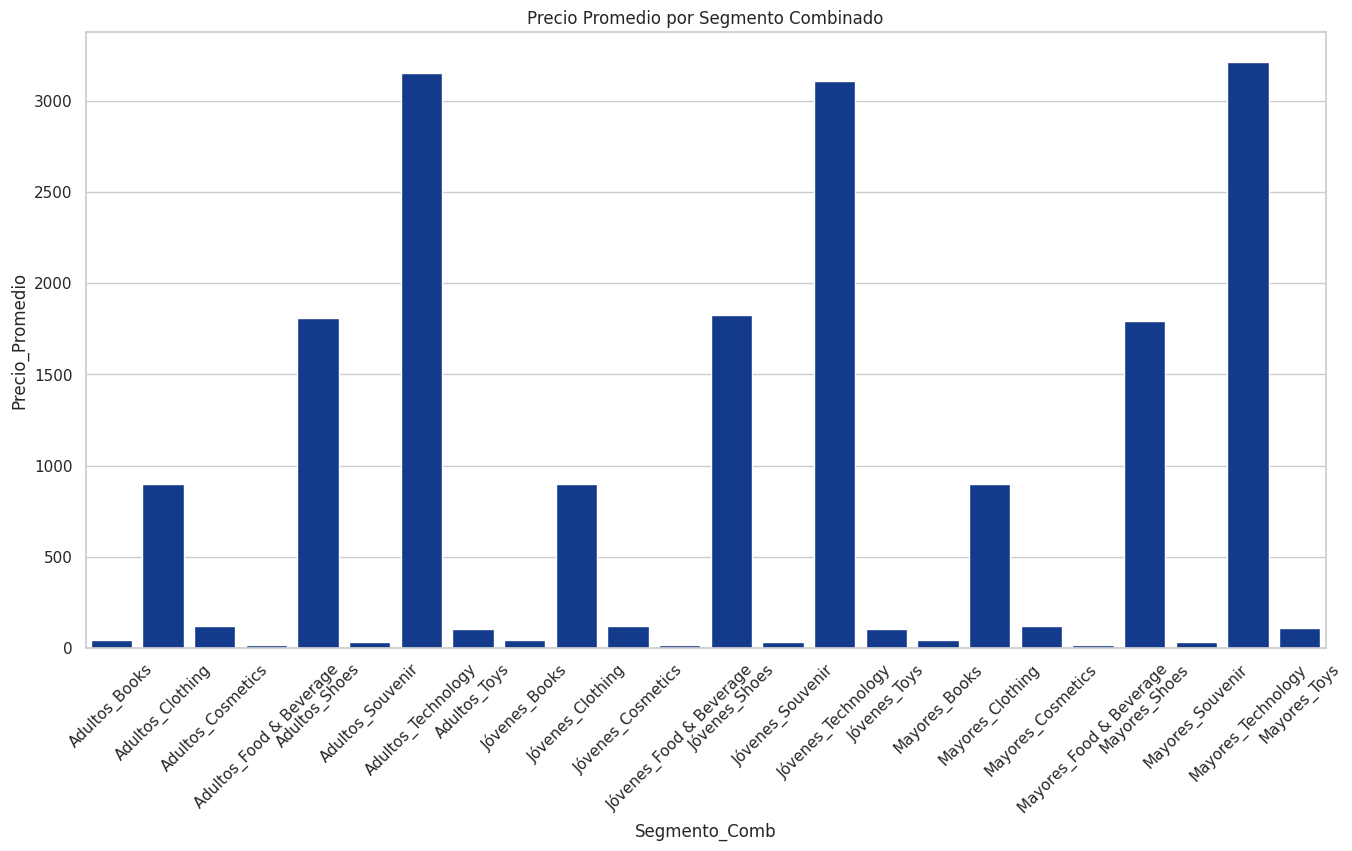

In [ ]:
promedio_segmentos = df.groupby('Segmento_Comb')['price'].mean().reset_index()
promedio_segmentos.columns = ['Segmento_Comb', 'Precio_Promedio']
print("Precio promedio por Segmento Combinado:")
print(promedio_segmentos)

plt.figure(figsize=(16,8))
sns.barplot(x='Segmento_Comb', y='Precio_Promedio', data=promedio_segmentos)
plt.title('Precio Promedio por Segmento Combinado')
plt.xticks(rotation=45)
plt.show()

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

1. Adultos que compran principalmente Ropa y Clientes con mayor frecuencia de visita y ticket promedio alto en centros comerciales específicos
2.Paquetes y promociones cruzadas
Ofrecer combos de bajo precio que incentiven la compra de múltiples productos.

 Activación y prueba de categorías premium
Descuentos o muestras de productos con mayor margen para estimular la migración hacia compras más rentables.

Campañas de retorno
Beneficios para la segunda y tercera compra, buscando aumentar la frecuencia de visita.

Educación y experiencia de compra
Mayor exhibición y comunicación dentro del mall para atraerlos hacia categorías más aspiracionales.

3.
Ropa y Zapatos concentran mayor demanda en centros comerciales con tráfico más alto → mayor oportunidad para promociones dirigidas.

Comida y Cosméticos dependen más del consumo espontáneo, por lo que funcionan mejor con campañas puntuales y mensajes visuales atractivos en PDV.

Los centros comerciales con menor variedad de categorías tienden a generar tickets más bajos, pero son ideales para desarrollar estrategias de crecimiento por frecuencia.

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!

**¿Cuántos segmentos son óptimos para la estrategia de la empresa?**
La cantidad de segmentos debe ajustarse a la capacidad de la compañía para crear y gestionar planes de marketing diferenciados. Con la segmentación desarrollada (edad, género, tipo de compra, método de pago y centro comercial), es recomendable concentrarse inicialmente en entre 3 y 5 segmentos estratégicos. Esto garantiza foco en los grupos que aportan mayor valor, evitando una división excesiva que complique la gestión comercial o incremente costos sin beneficio real.

**¿Cómo asignar el presupuesto de marketing entre estos segmentos?**
La inversión debe orientarse según el potencial de rentabilidad y crecimiento de cada grupo. Los segmentos que ya muestran alto valor económico o compras recurrentes deberían recibir una mayor porción del presupuesto para fortalecer su fidelidad. En cambio, los segmentos con bajo desempeño pero alto potencial pueden ser objetivo de estrategias de captación y conversión. Los segmentos de menor valor se pueden abordar con acciones más económicas y automatizadas para mantener rentabilidad.

**¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?**
Los KPIs deben alinearse con los objetivos por tipo de segmento. Se proponen:

Conversión: porcentaje de clientes impactados que compran

Ticket promedio (AOV): gasto promedio por transacción

Frecuencia de compra: recurrencia dentro del período analizado

Lifetime Value (LTV): ingresos esperados durante toda la relación

CAC: costo de adquirir un nuevo cliente por segmento

ROI de marketing: ganancia atribuible a la inversión en campaña

**Actividad Final: **Propuesta de Estrategia para un Segmento con Alto Potencial

Segmento Seleccionado con Mayor Potencial:
Teniendo en cuenta el margen y el volumen de ventas, se destacan dos segmentos clave:

Segmento de Alto Margen: el grupo de Souvenir resalta por su mayor precio unitario, lo que sugiere un margen elevado por transacción, aunque con una frecuencia de compra menor.

Segmento de Alto Volumen: la categoría Ropa muestra el mayor número de ventas, evidenciando una alta demanda, rotación constante y una gestión eficiente del inventario.

Ambos representan oportunidades distintas pero complementarias

***Estrategias Específicas Propuestas***

Para el Segmento de Ropa (Alto Volumen):
Nombre de la Campaña: “Estilo que se Renueva”
Objetivo: Incrementar la frecuencia de compra y mantener el volumen de ventas, aprovechando la alta demanda en ropa.
Tácticas:

Promociones frecuentes: lanzar nuevas colecciones y descuentos estacionales para incentivar compras recurrentes.

Fidelización: implementar programas de puntos o recompensas exclusivas para compradores habituales.

Ventas cruzadas: sugerir productos complementarios (accesorios o calzado) al momento de la compra.

Optimización de exhibición: mejorar la visibilidad de la categoría en tiendas y plataformas digitales para fortalecer su protagonismo.

Para el Segmento de Souvenir (Alto Margen):
Nombre de la Campaña: “Recuerdos que Perduran”
Objetivo: Elevar el valor promedio por compra y fomentar la percepción de exclusividad dentro de la categoría.
Tácticas:

Personalización: ofrecer grabados o diseños únicos para dar un toque distintivo a los productos.

Paquetes de regalo: combinar souvenirs temáticos o complementarios para aumentar el ticket promedio.

Comunicación emocional: destacar el valor simbólico y sentimental de regalar un souvenir único.

Exhibición destacada: ubicar esta categoría en zonas de alta visibilidad tanto física como digital, resaltando su exclusividad y calidad.

Justificación y Monitoreo del Desempeño

Justificación:
Trabajar sobre estos dos segmentos permite a la empresa equilibrar estrategias orientadas tanto al volumen como al margen de ganancia, asegurando un crecimiento sostenible y diversificado.

Monitoreo:
El desempeño de las estrategias será evaluado mediante los siguientes indicadores, diferenciados por segmento y punto de venta:

Evolución de Ventas: comparación histórica antes y después de las campañas.

KPIs de desempeño: tasa de conversión, valor promedio por pedido y frecuencia de compra.

Rotación de Inventario: velocidad con que los productos se venden, reflejando el impacto de las promociones.

Frecuencia por Centro Comercial: análisis de recurrencia de compra por ubicación para ajustar estrategias locales.

Rentabilidad por Segmento: cálculo del margen obtenido por categoría y grupo de clientes, permitiendo ajustar precios y promociones según su eficacia.